In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer 

In [15]:
df = pd.read_csv(r'E:\Mis Carpetas\Documentos\Data Science\car-prices.csv')
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [16]:
df.shape

(4345, 9)

In [17]:
df.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [20]:
df.dropna(inplace=True)

In [22]:
df.isna().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [26]:
print(df.Registration.nunique())
print(df.Registration.unique())

2
['yes' 'no']


In [29]:
df["Registration"].value_counts()

yes    3654
no      371
Name: Registration, dtype: int64

In [30]:
df["Registration"].value_counts(normalize=True)

yes    0.907826
no     0.092174
Name: Registration, dtype: float64

In [35]:
label = df.Registration.unique()

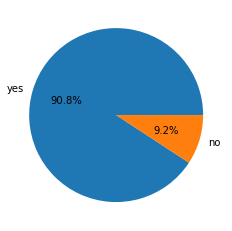

In [47]:
plt.pie(df["Registration"].value_counts(),labels=label, autopct="%.1f%%")
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Density'>

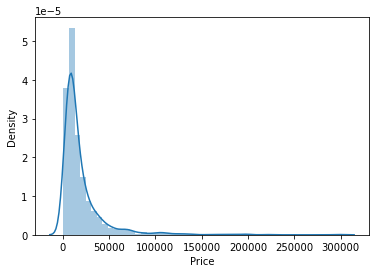

In [51]:
sns.distplot(df["Price"])

C:\Users\SION\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

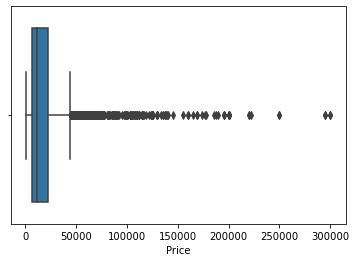

In [52]:
sns.boxplot(df.Price)

C:\Users\SION\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

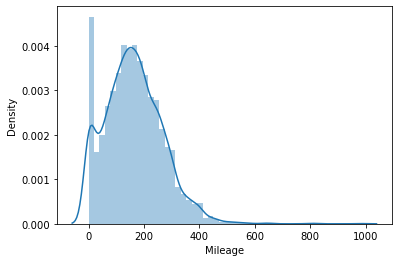

In [53]:
sns.distplot(df.Mileage)

C:\Users\SION\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mileage'>

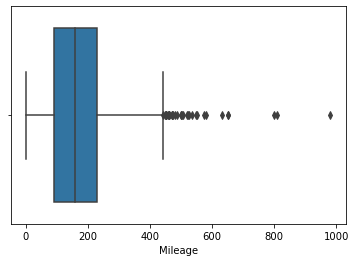

In [54]:
sns.boxplot(df.Mileage)

In [59]:
print(df.Body.nunique())
print(df.Body.unique())

6
['sedan' 'van' 'crossover' 'vagon' 'other' 'hatch']


In [60]:
df.Body.value_counts()

sedan        1534
crossover     824
van           626
other         394
vagon         379
hatch         268
Name: Body, dtype: int64

In [61]:
print(df.Year.min())
print(df.Year.max())

1969
2016


<AxesSubplot:xlabel='Year', ylabel='Price'>

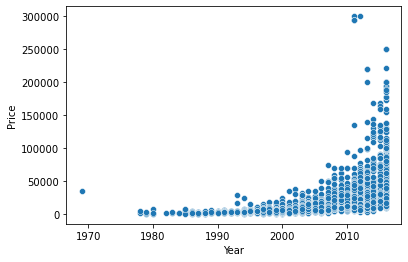

In [63]:
sns.scatterplot(data=df, x="Year", y="Price")

<AxesSubplot:xlabel='Year', ylabel='Price'>

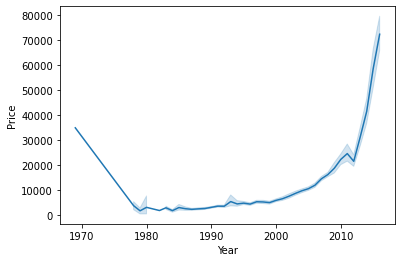

In [64]:
sns.lineplot(data = df, x="Year" , y="Price")

In [68]:
df[df["Year"]<1970]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
810,Mercedes-Benz,34999.0,sedan,150,2.8,Petrol,yes,1969,S 280


<AxesSubplot:xlabel='Year', ylabel='Mileage'>

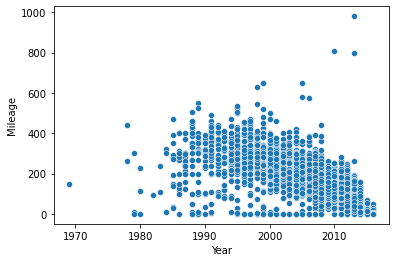

In [70]:
sns.scatterplot(data=df, x="Year", y="Mileage")

<AxesSubplot:xlabel='Year', ylabel='Mileage'>

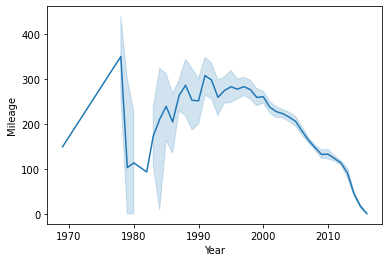

In [71]:
sns.lineplot(data=df, x="Year", y="Mileage")

In [75]:
print(df.Model.nunique())
#print(df.Model.unique())

306


In [82]:
import statistics as stat
moda = stat.mode(list(df.Model))

In [84]:
moda

'E-Class'

In [85]:
df.Model.value_counts()

E-Class     188
Vito        156
A6          156
Kangoo      136
Camry       127
           ... 
CLK 430       1
1 Series      1
CLC 180       1
Lite Ace      1
SLK 350       1
Name: Model, Length: 306, dtype: int64

In [86]:
df.drop(columns="Model",axis=1,inplace=True)

In [87]:
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


In [88]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline, make_union
from sklearn.base import BaseEstimator, TransformerMixin

In [89]:
class SelectColumns(BaseEstimator, TransformerMixin):
    def __init__(self, names=None):
        self.names = names

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X):
        return X[self.names]

In [90]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

In [91]:
cat_cols = ["Brand", "Body", "Engine Type","Registration"]
num_cols = ["Mileage","EngineV","Year"]

In [92]:
pipe = Pipeline([
    ("features", FeatureUnion([
        ('numeric', make_pipeline(SelectColumns(names=num_cols), StandardScaler())),
        ('categorical', make_pipeline(SelectColumns(names=cat_cols), OneHotEncoder(sparse=False)))
    ])),
    ('model', DecisionTreeRegressor(random_state=0))
])

In [98]:

X = df.drop(columns="Price", axis=1)
y = df["Price"].copy()

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('numeric',
                                                 Pipeline(steps=[('selectcolumns',
                                                                  SelectColumns(names=['Mileage',
                                                                                       'EngineV',
                                                                                       'Year'])),
                                                                 ('standardscaler',
                                                                  StandardScaler())])),
                                                ('categorical',
                                                 Pipeline(steps=[('selectcolumns',
                                                                  SelectColumns(names=['Brand',
                                                                                       'Body',
                        

In [101]:
y_test_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)

In [102]:
from sklearn.metrics import mean_absolute_error

In [103]:
print(mean_absolute_error(y_train, y_train_pred))
print(mean_absolute_error(y_test, y_test_pred))

264.98178633540374
4317.271349068323


In [104]:
pipe.score(X_train, y_train)

0.9900348757878542

In [105]:
pipe.score(X_test, y_test)

0.7594525039429834

In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
parameters = {
    'max_depth': [2,3,4,5,6],
    'min_samples_split': [1, 2, 3, 4, 5, 6],
    'min_samples_leaf': [1,2,3,4]
}

In [108]:
clf = GridSearchCV(pipe, parameters)
clf.fit(X_train, y_train)

ValueError: Invalid parameter max_depth for estimator Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('numeric',
                                                 Pipeline(steps=[('selectcolumns',
                                                                  SelectColumns(names=['Mileage',
                                                                                       'EngineV',
                                                                                       'Year'])),
                                                                 ('standardscaler',
                                                                  StandardScaler())])),
                                                ('categorical',
                                                 Pipeline(steps=[('selectcolumns',
                                                                  SelectColumns(names=['Brand',
                                                                                       'Body',
                                                                                       'Engine '
                                                                                       'Type',
                                                                                       'Registration'])),
                                                                 ('onehotencoder',
                                                                  OneHotEncoder(sparse=False))]))])),
                ('model', DecisionTreeRegressor(random_state=0))]). Check the list of available parameters with `estimator.get_params().keys()`.

In [109]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'features', 'model', 'features__n_jobs', 'features__transformer_list', 'features__transformer_weights', 'features__verbose', 'features__numeric', 'features__categorical', 'features__numeric__memory', 'features__numeric__steps', 'features__numeric__verbose', 'features__numeric__selectcolumns', 'features__numeric__standardscaler', 'features__numeric__selectcolumns__names', 'features__numeric__standardscaler__copy', 'features__numeric__standardscaler__with_mean', 'features__numeric__standardscaler__with_std', 'features__categorical__memory', 'features__categorical__steps', 'features__categorical__verbose', 'features__categorical__selectcolumns', 'features__categorical__onehotencoder', 'features__categorical__selectcolumns__names', 'features__categorical__onehotencoder__categories', 'features__categorical__onehotencoder__drop', 'features__categorical__onehotencoder__dtype', 'features__categorical__onehotencoder__handle_unknown', 'features__categoric

In [110]:
parameters = {
    'model__max_depth': [2,3,4,5,6],
    'model__min_samples_split': [1, 2, 3, 4, 5, 6],
    'model__min_samples_leaf': [1,2,3,4]
}

In [112]:
gridsearch = GridSearchCV(pipe,parameters,n_jobs=-1)
gridsearch.fit(X_train, y_train)

C:\Users\SION\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.50291786 0.50291786 0.50291786 0.50291786 0.50291786
        nan 0.50291786 0.50291786 0.50291786 0.50291786 0.50291786
        nan 0.50291786 0.50291786 0.50291786 0.50291786 0.50291786
        nan 0.50291786 0.50291786 0.50291786 0.50291786 0.50291786
        nan 0.63577016 0.63577016 0.63577016 0.63577016 0.63577016
        nan 0.63577016 0.63577016 0.63577016 0.63577016 0.63577016
        nan 0.63577016 0.63577016 0.63577016 0.63577016 0.63577016
        nan 0.63577016 0.63577016 0.63577016 0.63577016 0.63577016
        nan 0.71458887 0.71458887 0.71458887 0.71458887 0.71458887
        nan 0.71458887 0.71458887 0.71458887 0.71458887 0.71458887
        nan 0.71935438 0.71935438 0.71935438 0.71935438 0.71935438
        nan 0.72130574 0.72130574 0.72130574 0.72130574 0.72130574
        nan 0.7952146  0.7952146  0.7952146  0.7949865

GridSearchCV(estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('numeric',
                                                                        Pipeline(steps=[('selectcolumns',
                                                                                         SelectColumns(names=['Mileage',
                                                                                                              'EngineV',
                                                                                                              'Year'])),
                                                                                        ('standardscaler',
                                                                                         StandardScaler())])),
                                                                       ('categorical',
                                                                        Pipeline(steps=[('s

In [113]:
gridsearch.best_params_

{'model__max_depth': 6,
 'model__min_samples_leaf': 4,
 'model__min_samples_split': 2}

In [114]:
y_test_pred = gridsearch.predict(X_test)
y_train_pred = gridsearch.predict(X_train)

In [117]:
print(f"Score en test: ",mean_absolute_error(y_test,y_test_pred))
print(f"Score en train: ",mean_absolute_error(y_train, y_train_pred))

Score en test:  4456.7228021167175
Score en train:  4384.569217319796


In [118]:
gridsearch.score(X_train, y_train)

0.8751464653344689

In [119]:
gridsearch.score(X_test, y_test)

0.8476231186105145